In [1]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import seaborn
import warnings
import math
warnings.filterwarnings('ignore')

In [2]:
# Loading the Dataset directly from the raw link
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')

In [3]:
# Taking a look at our Dataset
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


This dataset contain 158 rows and 12 columns. 

In [4]:
# Checking datatypes of our features
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

There are 2 features with object data type , we will convert these features into int data type after some time .

In [5]:
# Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<Axes: >

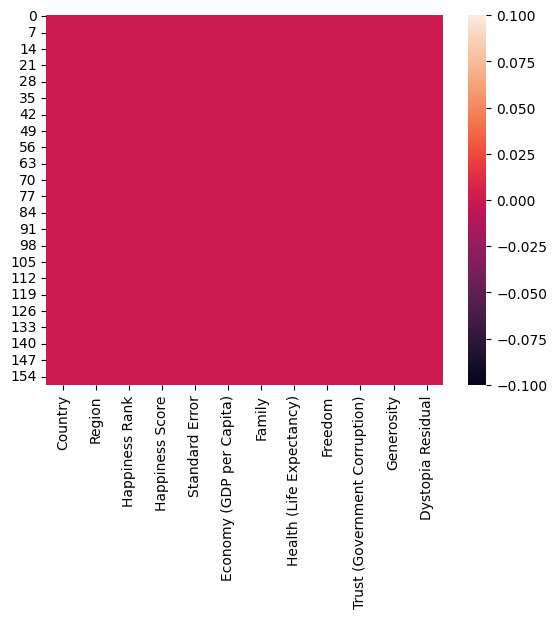

In [7]:
sns.heatmap(df.isnull())

As we can see there are no missing values 

In [8]:
# Summary Statistics
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


from the dataset above we can detect the presence of outliers in columns such as in "Standard error" there is a significant gap between 75th percentile and max percentile,and same with "Trust", and "Genrosity" 

From summary statistics, we can see that for some countries min values are 0. so let's find out the countries at bottom in respective category.

In [11]:
# Iterating through each column (except 'Country')
for column in df.columns[1:]:
    # Checking if the minimum value in the column is 0
    if df[column].min() == 0:
        # Filtering countries with 0 as minimum value
        countries_with_zero_min = df[df[column] == 0]['Country']
        # Printing column name and corresponding countries
        print(f"Countries with 0 as minimum value in {column}:")
        print(countries_with_zero_min)
        print()

Countries with 0 as minimum value in Economy (GDP per Capita):
119    Congo (Kinshasa)
Name: Country, dtype: object

Countries with 0 as minimum value in Family:
147    Central African Republic
Name: Country, dtype: object

Countries with 0 as minimum value in Health (Life Expectancy):
122    Sierra Leone
Name: Country, dtype: object

Countries with 0 as minimum value in Freedom:
111    Iraq
Name: Country, dtype: object

Countries with 0 as minimum value in Trust (Government Corruption):
73    Indonesia
Name: Country, dtype: object

Countries with 0 as minimum value in Generosity:
101    Greece
Name: Country, dtype: object



In [13]:
# Creating a new DataFrame with numerical data types for further analysis
# Selecting columns with numerical data types
num_cols = df.select_dtypes(include=['float64', 'int64'])

# Creating a new DataFrame with numerical columns
num_df = df[num_cols.columns]

# Displaying the new DataFrame
print("New DataFrame with Numerical Data Types:")
print(num_df.head())


New DataFrame with Numerical Data Types:
   Happiness Rank  Happiness Score  Standard Error  Economy (GDP per Capita)  \
0               1            7.587         0.03411                   1.39651   
1               2            7.561         0.04884                   1.30232   
2               3            7.527         0.03328                   1.32548   
3               4            7.522         0.03880                   1.45900   
4               5            7.427         0.03553                   1.32629   

    Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0  1.34951                   0.94143  0.66557                        0.41978   
1  1.40223                   0.94784  0.62877                        0.14145   
2  1.36058                   0.87464  0.64938                        0.48357   
3  1.33095                   0.88521  0.66973                        0.36503   
4  1.32261                   0.90563  0.63297                        0.32957  

In [14]:
num_df.shape

(158, 10)

In [15]:
num_df.columns

Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [16]:
X=num_df.drop(columns =['Happiness Score'])
Y=num_df['Happiness Score']

# Exploratory Data Analysis

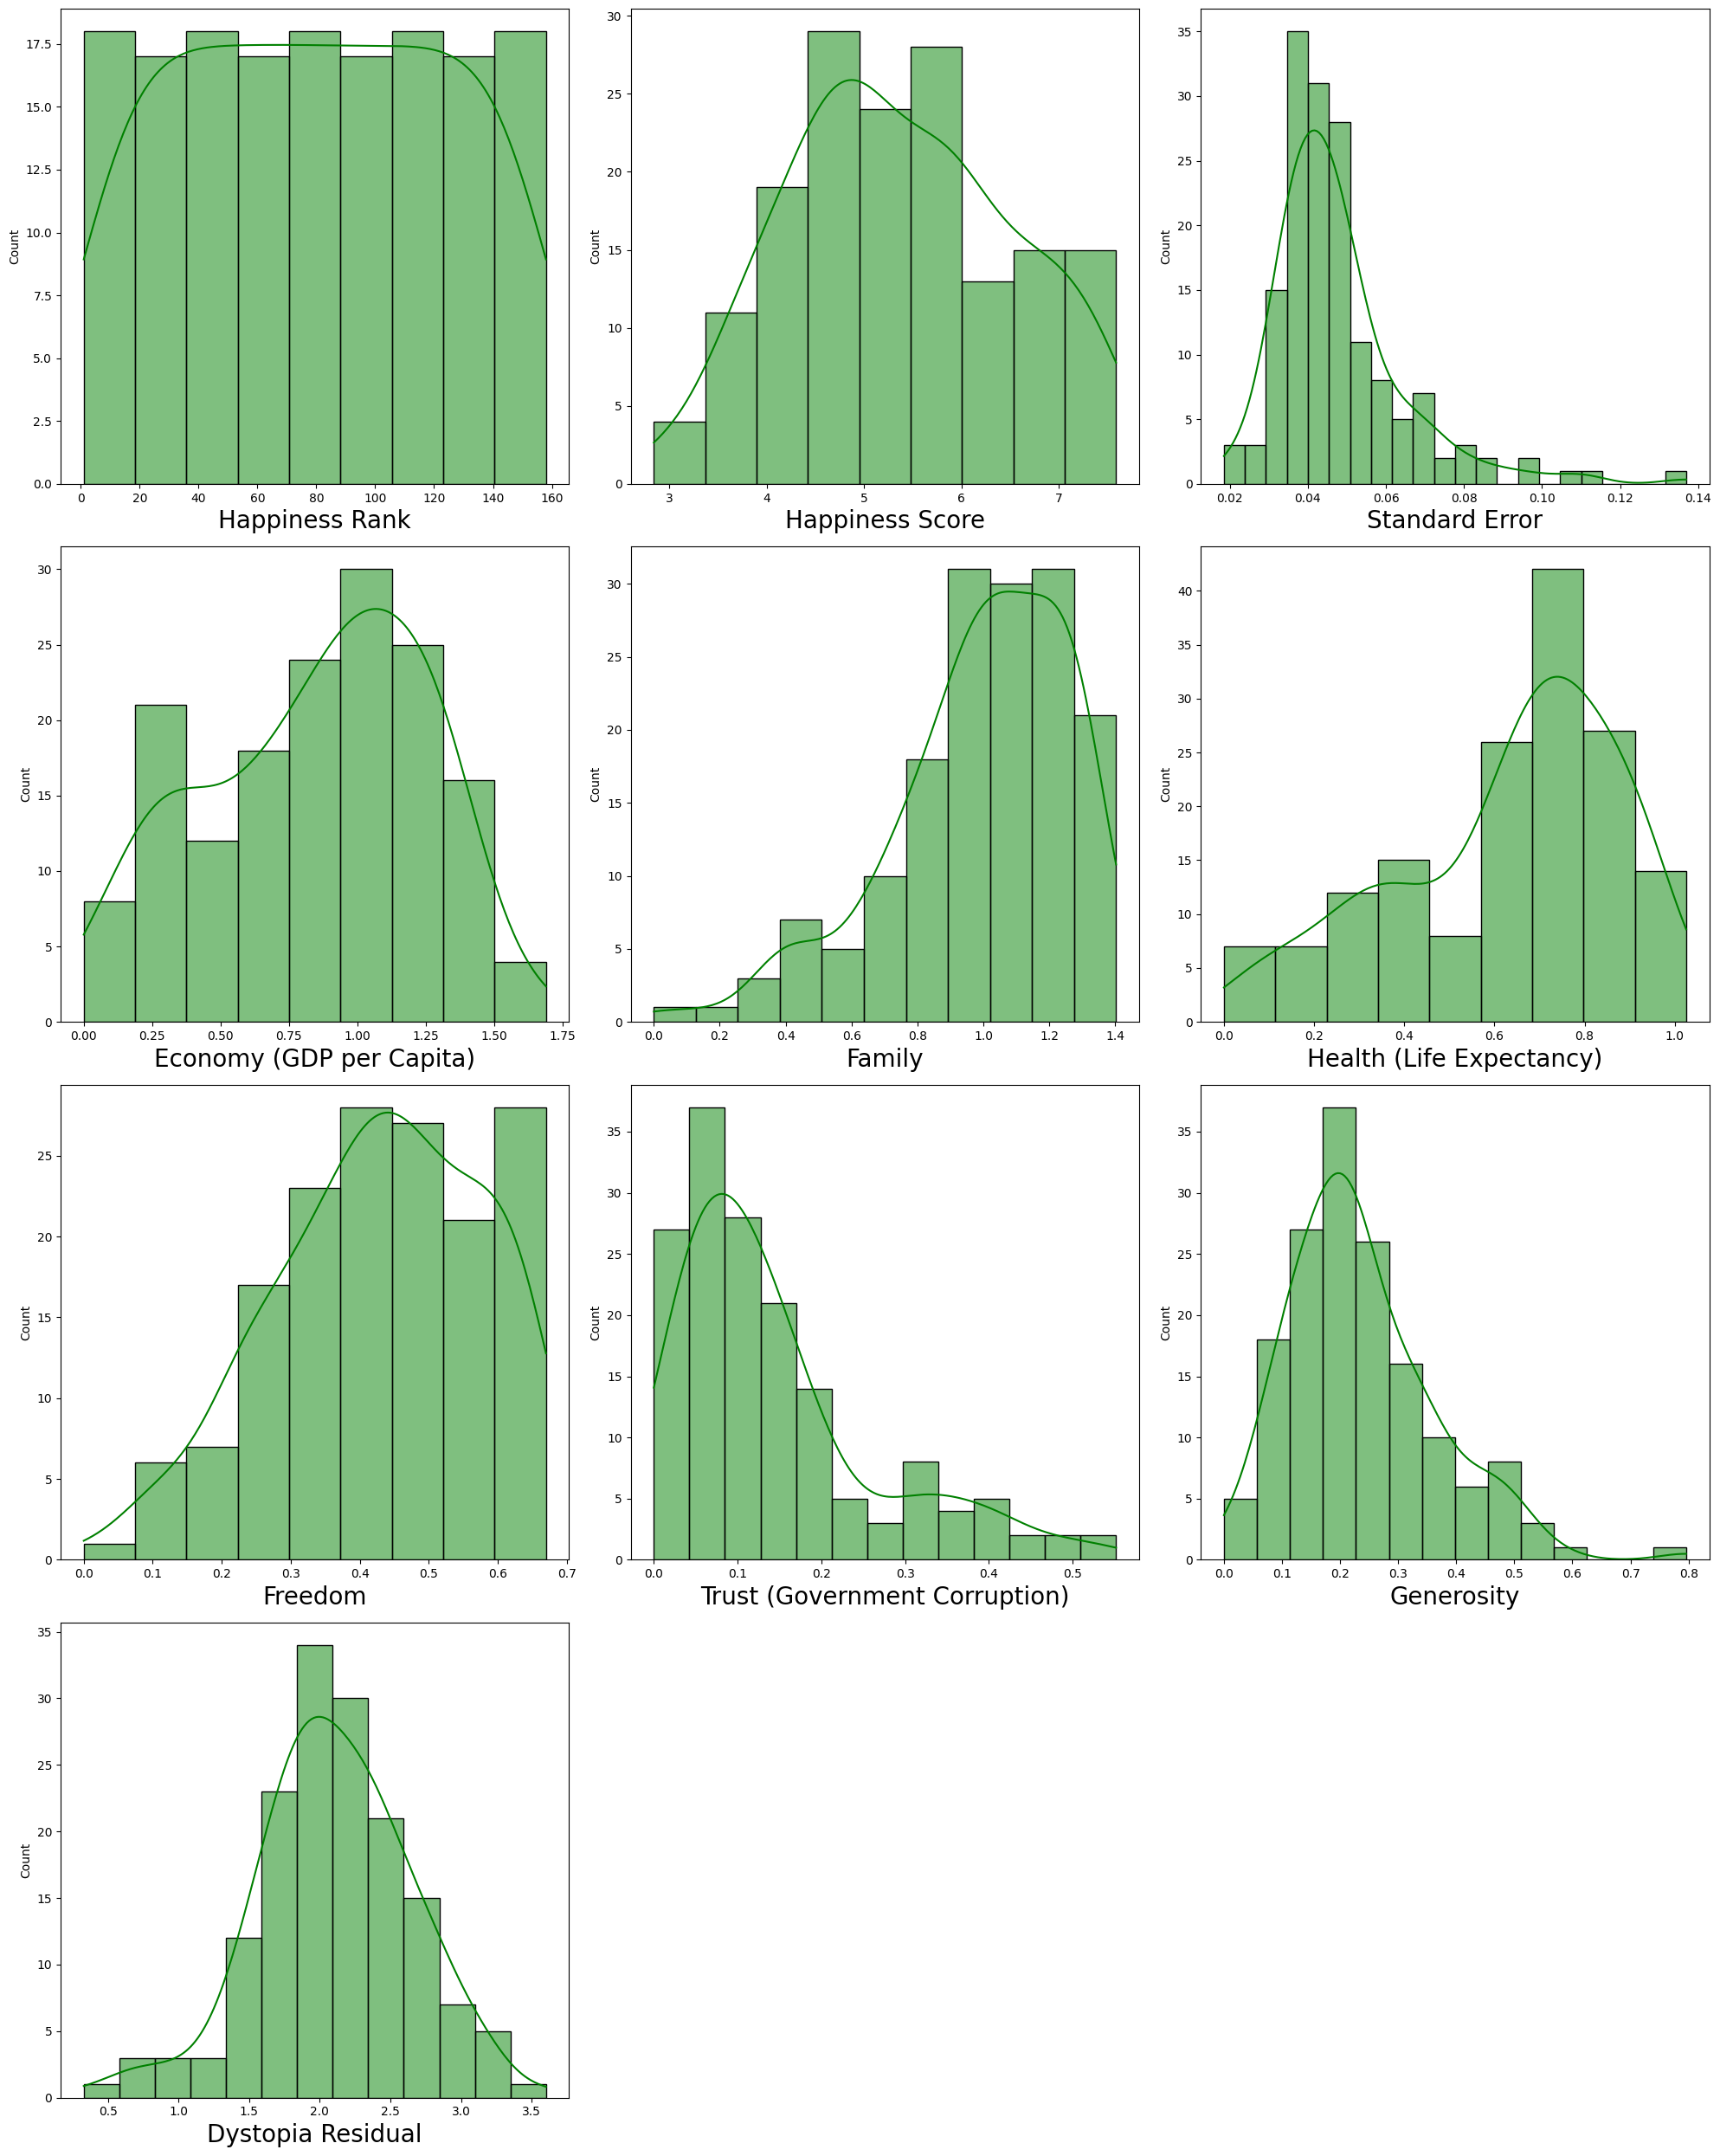

In [19]:
# Calculating the number of columns and rows needed for subplots
num_cols = min(len(num_df.columns), 3)  
num_rows = -(-len(num_df.columns) // num_cols)  
# Setting the figure size and creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 25), facecolor='white')

# Flattening the axes for easy iteration
axes = axes.flatten()

# Iterating over each column in num_df and plot
for i, column in enumerate(num_df.columns):  
    sns.histplot(num_df[column], ax=axes[i], color='g', kde=True)
    axes[i].set_xlabel(column, fontsize=20)

# Removing any excess empty subplots
for j in range(len(num_df.columns), len(axes)):
    fig.delaxes(axes[j])
    
# Adjusting layout
plt.tight_layout()
plt.show()

In [20]:
num_df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

The skewness values offer insight into key distribution characteristics of features in the dataset. Notably, the Happiness Score exhibits a slight right-skew, indicating a prevalence of higher scores, while the Standard Error shows a heavy right-skew, with most countries clustered around lower values. Trust (Government Corruption) demonstrates a notable right-skew, suggesting a majority of countries have lower trust levels in government institutions. Additionally, Generosity displays a right-skew, implying more countries with higher generosity scores.

In [22]:
from scipy.stats import boxcox
skewness = num_df.skew()

# Applying Box-Cox transformation to features with skewness greater than 0.5 or less than -0.5
skewed_features = [
    'Standard Error',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity'
]

for feature in skewed_features:
    if abs(skewness[feature]) > 0.5:
        num_df[feature], _ = boxcox(num_df[feature] + 1) 


In [23]:
new_skewness = num_df.skew()
print("New Skewness Values after Transformation:")
print(new_skewness)

New Skewness Values after Transformation:
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.317575
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.413462
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual               -0.238911
dtype: float64


In [24]:
# Multicollinearity using Variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = X.columns
# Let's check  the Values
vif

,vif,Features
0,4.129728,Happiness Rank
1,9.795542,Standard Error
2,24.157105,Economy (GDP per Capita)
3,26.022152,Family
4,23.623842,Health (Life Expectancy)
5,15.887615,Freedom
6,3.498336,Trust (Government Corruption)
7,5.683814,Generosity
8,12.577143,Dystopia Residual


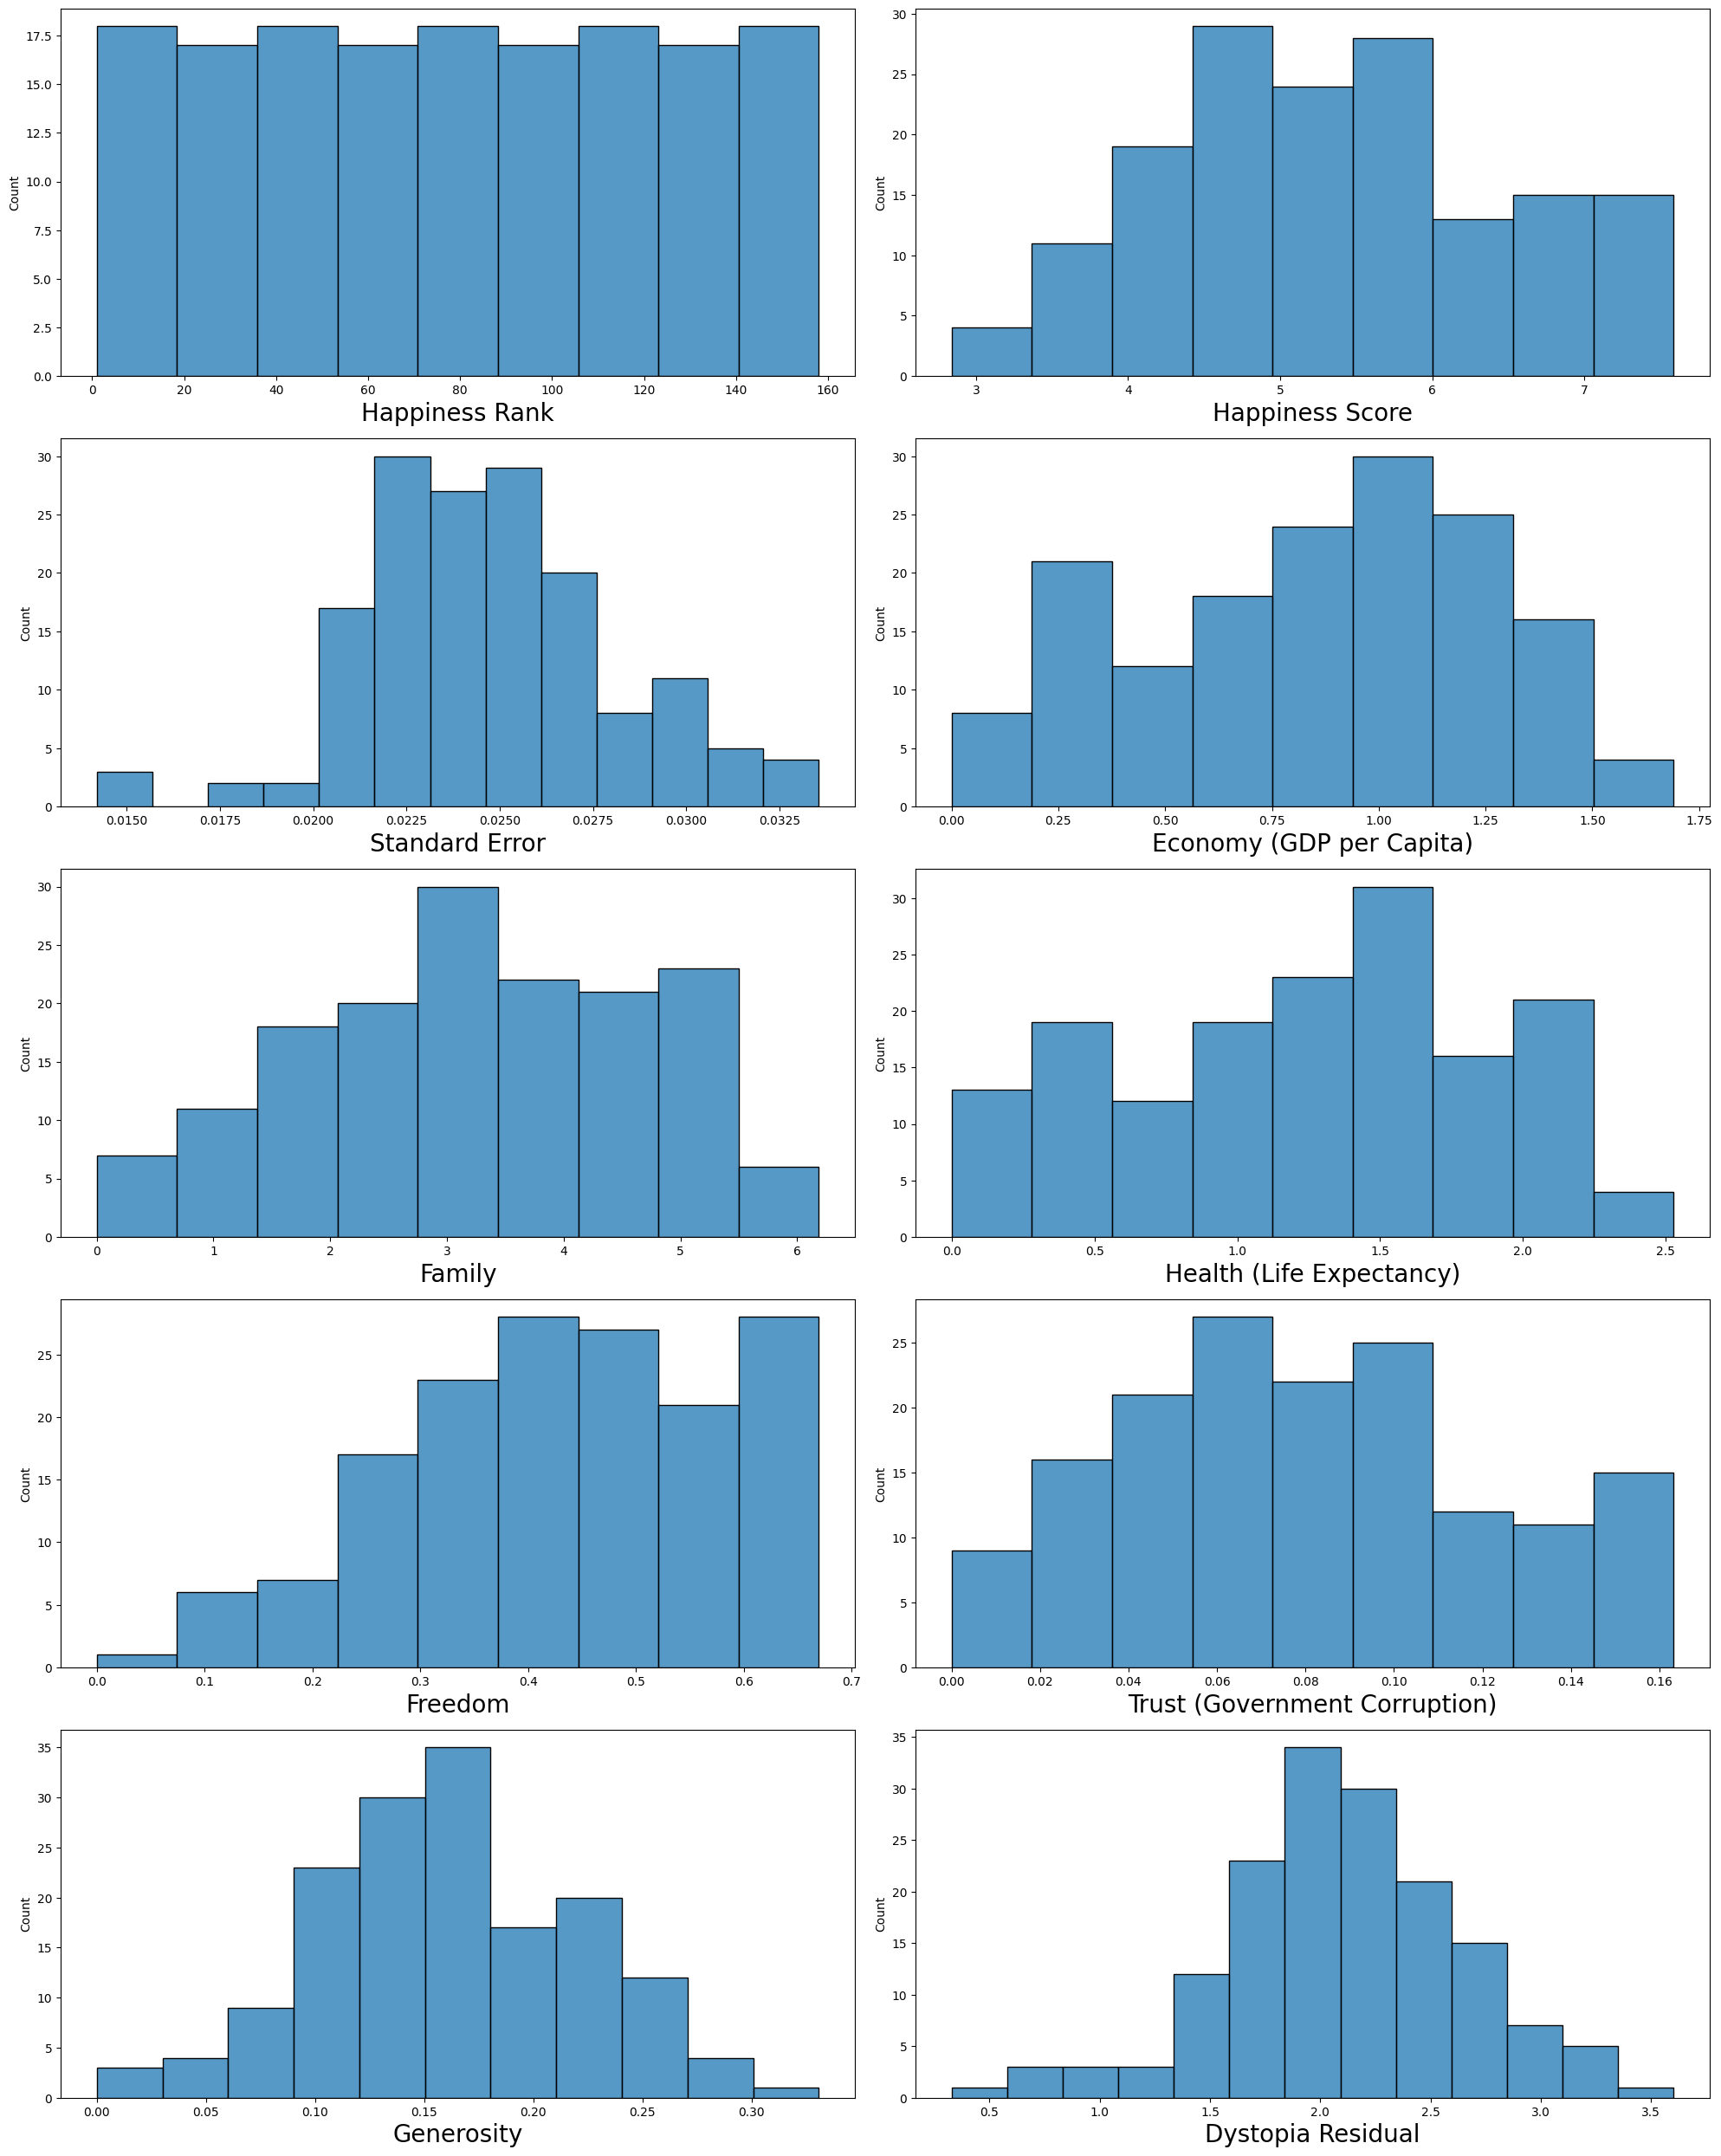

In [29]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in num_df:
    if plotnumber <=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.histplot(num_df[column], palette='Rainbow' )
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [30]:
# Investingating Correlation between features
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


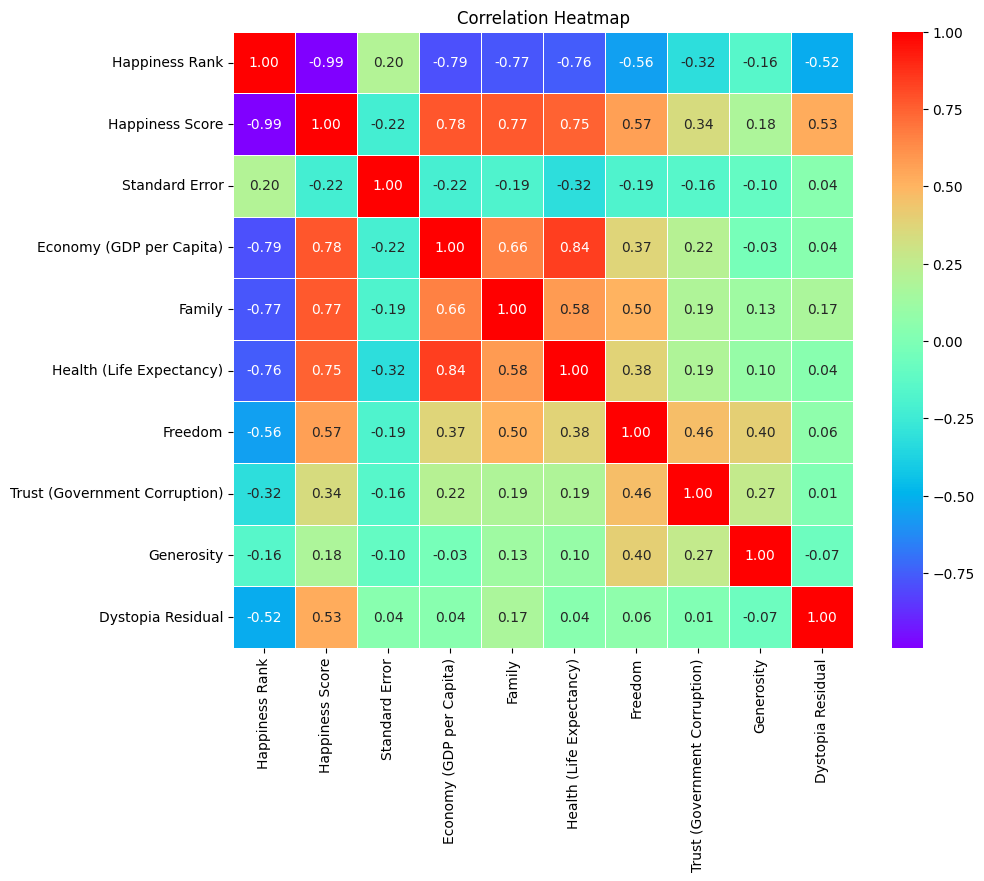

In [31]:
# Calculating the correlation matrix
correlation_matrix = num_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [32]:
# Top 10 happiest countries based on Happiness rank/score
top = df.sort_values(by='Happiness Score', ascending= False).head(10)
top

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


We can see that Switzerland Top the chart with Happiness score of 7.587. We can see that 8 countries out of 10 are from Western Europe

In [33]:
# Bottom 10 countries happiest countries based on Happiness rank/score
bottom =df.sort_values(by='Happiness Score', ascending=True).head(10)
bottom

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


We can see that Chad from Sub-Saharan Africa. Top the chart with Happiness score of 7.587. We can see that 8 countries out of Bottom 10 are from Sub-Saharan Africa.

In [34]:
Reg=df.groupby('Region')
Reg['Happiness Score'].describe().sort_values(by='mean', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,2.0,7.285000,0.001414,7.284,7.28450,7.285,7.28550,7.286
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253


We can see that Australia and New Zealand is the happiest region and Sub-Saharan Africa is the least happiest region

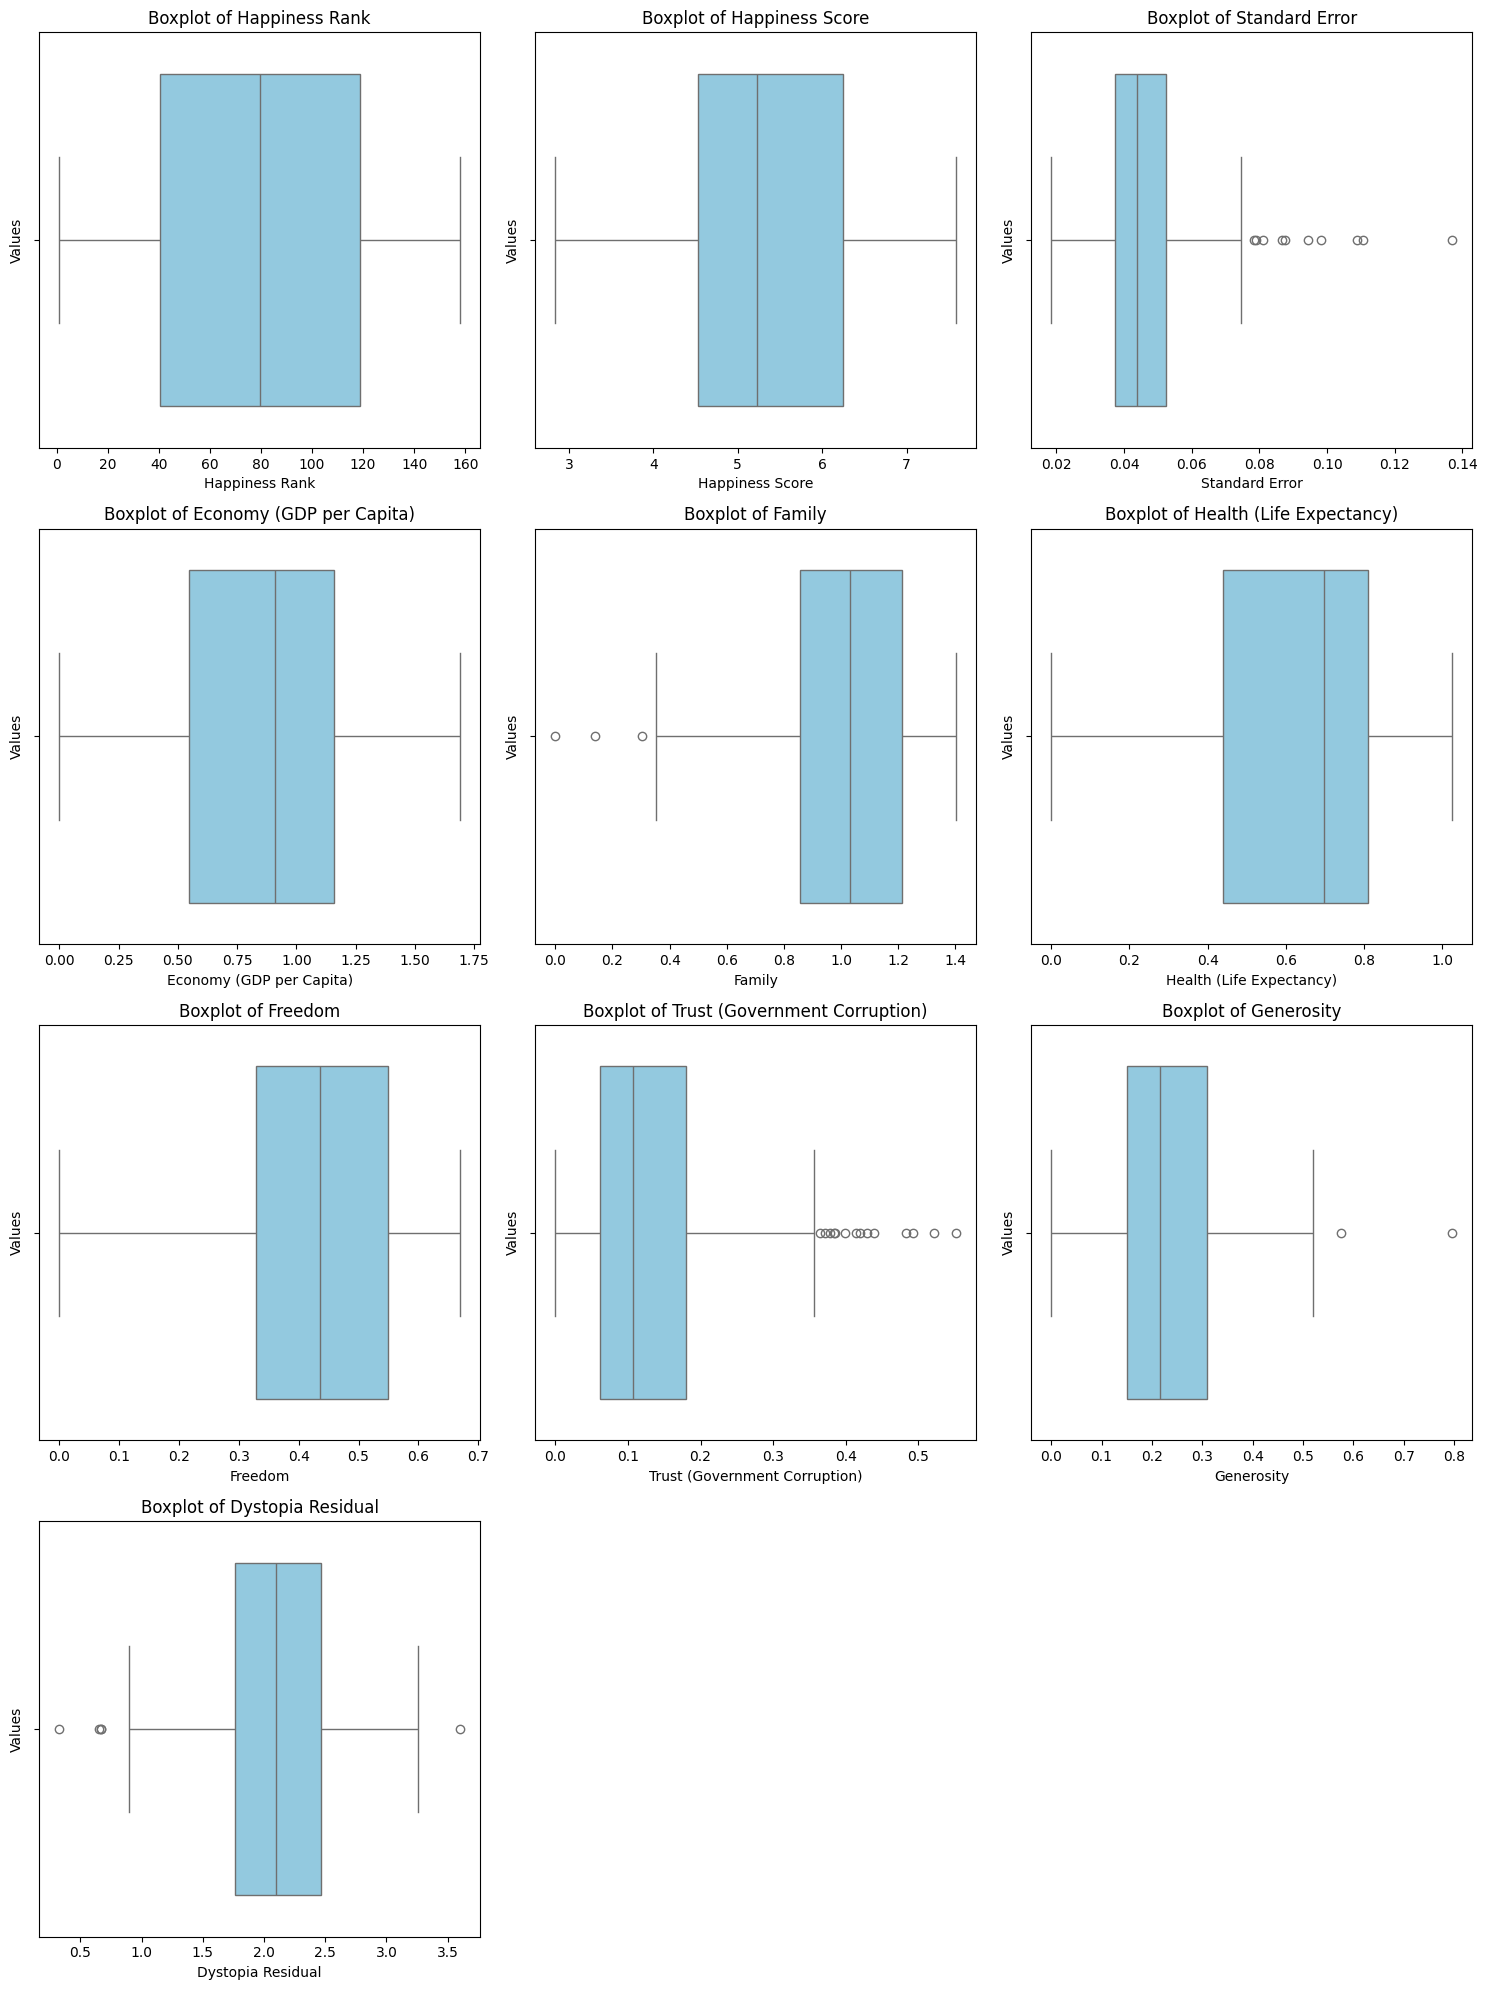

In [35]:
# creating instance for numerical columns
num_col=df.select_dtypes(include=['float64','int64'])

# Calculating number of rows and columns for the subplot grid
num_cols = len(num_col.columns)
num_rows = math.ceil(num_cols / 3) 

# Creating subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Flattening the axes array to handle cases where there's only one row
axes = axes.flatten()

# Looping through each numerical column and creating a separate boxplot
for i, column in enumerate(num_col.columns):
    sns.boxplot(ax=axes[i], x=df[column], orient='v', color='skyblue')
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel('Values')

# Hiding any empty subplots
for j in range(num_cols, len(axes)):
    axes[j].axis('off')

# Adjusting layout
plt.tight_layout()

plt.show()

As we can see there is presence of outliers in columns such as "Standard error","Family","Trust","Genrosity" and "Dystopia Residual"

# Model Training and Evaluation

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(110, 9)
(110,)
(48, 9)
(48,)


### Linear Regression

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30, random_state=42)
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_train,Y_train)
y_pred=lr.predict(X_test)
print('Predicted result price:\n', y_pred)
print('\n')
print('actual price\n',Y_test)

Predicted result price:
 [4.30693449 5.98714272 4.19425982 2.90456706 5.05723462 6.57407268
 4.89749896 4.87599755 4.9487117  3.93081994 6.90135965 5.82831089
 6.9825805  5.5481848  6.78623667 6.50510366 4.50713727 4.6855493
 4.97107781 5.69532099 3.65506062 6.93737649 7.19982715 7.28400563
 6.48514929 5.19233195 5.88900594 3.95562662 4.36911795 3.680872
 3.78080526 5.33250706 3.99479272 5.83268293 4.34998494 5.128864
 3.34004927 6.1227946  5.60464161 4.55051753 6.6696726  4.03297635
 5.25284693 3.65590103 6.30244463 5.2863805  6.81021591 4.21850415]


actual price
 128    4.307
45     5.987
134    4.194
156    2.905
90     5.057
29     6.574
96     4.898
98     4.876
95     4.949
140    3.931
19     6.901
56     5.828
15     6.983
69     5.548
24     6.786
30     6.505
122    4.507
109    4.686
93     4.971
65     5.695
150    3.655
18     6.937
12     7.200
9      7.284
31     6.485
81     5.192
51     5.889
139    3.956
125    4.369
146    3.681
145    3.781
75     5.332
137    3.99

### Linear Regression Evaluation Matrix

In [42]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred))

 Error :
Mean absolute error : 0.00023250558055427453
Mean squared error : 7.709183495449714e-08
Root Mean Squared Error: 0.00027765416430245945


 R2 Score :
0.9999999420878091


### Applying other Regression Model

In [43]:
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
ad=AdaBoostRegressor()

model = [rf,svr,dtc,ad]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
                                            
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('\n')

 Error of  RandomForestRegressor() :
Mean absolute error : 0.04381812500000048
Mean squared error : 0.004595909977083398
Root Mean Squared Error: 0.06779314107698063


 R2 Score :
0.9965475044634778


 Error of  SVR() :
Mean absolute error : 0.07328943726663247
Mean squared error : 0.0161238648567719
Root Mean Squared Error: 0.126979781291243


 R2 Score :
0.987887584455077


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.04893749999999997
Mean squared error : 0.0053264375000000004
Root Mean Squared Error: 0.07298244651969404


 R2 Score :
0.9959987245646651


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.048113934358148584
Mean squared error : 0.0052963058324581825
Root Mean Squared Error: 0.07277572282333018


 R2 Score :
0.9960213597877688




from the output above we can see that linear regression is our best model

### Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr, X, Y, cv = 5)
print('\033[1m'+'Cross Validation Score :'+'\033[0m\n')
print("Score :" ,score)
print("Mean Score :",score.mean())
print("Std deviation :",score.std())

Cross Validation Score :

Score : [0.99999947 0.99999839 0.99999831 0.99999539 0.99999945]
Mean Score : 0.9999982015731523
Std deviation : 1.490332379076989e-06


### Saving the model

In [45]:
import joblib
joblib.dump(lr,'lr.obj')

['lr.obj']